# Fig. 12: Number of Principal Components removed

In [22]:
import os
import warnings
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp2d, NearestNDInterpolator

In [23]:
APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

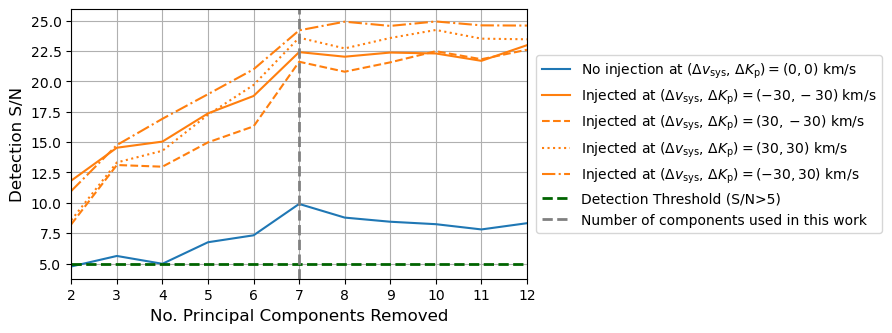

In [24]:
kp = 200.7e3
vsys = -20e3
dirin_xcor = os.path.abspath('../data/xcor_out')
modelname = 'W189b_pRT_1D_Yan22_chem_eq_all'
dataset = 'WASP-189_2023A_2023_06_09_2024A_2024_04_19'
inj_list = [
    '',
    '_sf_1.000_dvsys_inj_-30_dkp_inj_-30',
    '_sf_1.000_dvsys_inj_30_dkp_inj_-30',
    '_sf_1.000_dvsys_inj_30_dkp_inj_30',
    '_sf_1.000_dvsys_inj_-30_dkp_inj_30'
]
labels = [
    r'No injection at $(\Delta v_{\rm{sys}}$, $\Delta K_{\rm{p}})=(0, 0)$ km/s',
    r'Injected at $(\Delta v_{\rm{sys}}$, $\Delta K_{\rm{p}})=(-30, -30)$ km/s',
    r'Injected at $(\Delta v_{\rm{sys}}$, $\Delta K_{\rm{p}})=(30, -30)$ km/s',
    r'Injected at $(\Delta v_{\rm{sys}}$, $\Delta K_{\rm{p}})=(30, 30)$ km/s',
    r'Injected at $(\Delta v_{\rm{sys}}$, $\Delta K_{\rm{p}})=(-30, 30)$ km/s'
]
colors = [tableau20[0], tableau20[2], tableau20[2], tableau20[2], tableau20[2]]
lss = ['-', '-', '--', ':', 'dashdot']

dvsys_list = [0., -30e3, 30e3, 30e3, -30e3]
dkp_list = [0., -30e3, -30e3, 30e3, 30e3]

plt.subplots(figsize=(APJ_SINGLE_COL*1.68, APJ_SINGLE_COL*1.))
npc_list = np.arange(2,13,1)
snr_at_inj = np.zeros(len(npc_list)) * np.nan
for inj, dkp_inj, dvsys_inj, label, c, ls in zip(inj_list, dvsys_list, dkp_list, labels, colors, lss):
    for n, npc in enumerate(npc_list):
        try:
            dirin = f'{dirin_xcor}/{dataset}/{modelname}/NPC_{npc}_mp_70{inj}_ccw/'
            file = 'snrmap.pkl'
            kp_values, vsys_values, snrmap = pickle.load(open(os.path.join(dirin, file), 'rb'))


            #points = np.array( (vsys_grid.flatten(), kp_grid.flatten()) ).T
            values = snrmap.flatten()

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                f = interp2d(vsys_values, kp_values, snrmap.T, kind='cubic')
            snr_at_inj[n] = f(dvsys_inj, kp+dkp_inj)[0]
            snr_at_inj[n] = np.max(snrmap)
        except:
            continue

    plt.plot(npc_list, snr_at_inj, label=label, color=c, ls =ls)
plt.axhline(y=5, lw=2, ls='--', color='darkgreen', label='Detection Threshold (S/N>5)')
plt.axvline(x=7, lw=2, ls='--', color='gray', label='Number of components used in this work')

plt.xticks(npc_list)
plt.xlim(npc_list.min(),npc_list.max())
plt.legend(bbox_to_anchor=(1.4, 0.5), loc='center', fontsize=TEXTSIZE-2)
plt.grid()
plt.xlabel('No. Principal Components Removed', size=TEXTSIZE)
plt.ylabel('Detection S/N', size=TEXTSIZE)
fname = 'Fig12_pca_inj_noninj'
plt.savefig('../figures/'+fname+'.png', dpi=200, bbox_inches='tight')
plt.savefig('../figures/'+fname+'.pdf', bbox_inches='tight')
plt.show()